In [31]:
import pandas as pd
import glob
import json
import seaborn as sns

In [32]:
paths = glob.glob('data/**/paths.json', recursive=True)
properties = glob.glob('data/**/properties.json', recursive=True)

In [50]:
df_paths = pd.DataFrame([json.load(open(file)) for file in paths])
df_properties = pd.DataFrame([json.load(open(file)) for file in properties])

df = pd.merge(df_paths, df_properties, on='name')

df["path_count"] = df["paths"].apply(lambda x: len(x))
df["pairablepath_count"] = df["paths"].apply(lambda x: len([y for y in x if y["pairable"]]))
df["unpairablepath_count"] = df["paths"].apply(lambda x: len([y for y in x if not y["pairable"]]))
df["min_permanent"] = df["paths"].apply(lambda x: min([y["permanent"] for y in x]))
df["max_permanent"] = df["paths"].apply(lambda x: max([y["permanent"] for y in x]))

KeyError: 'perm'

<AxesSubplot:xlabel='pairablepath_count', ylabel='conductance'>

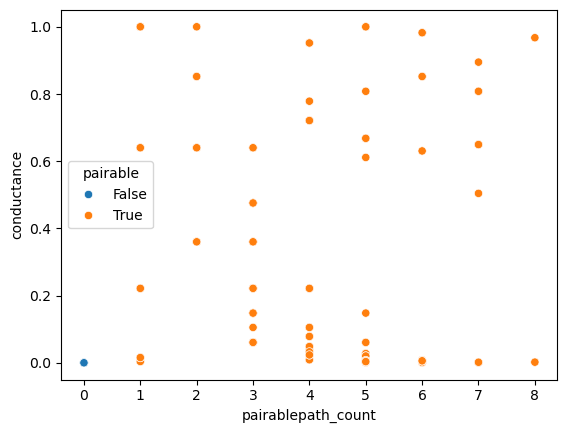

In [48]:
sns.scatterplot(
    data=df,#.query('permanent >= 0'),
    x='pairablepath_count',
    y='conductance',
    hue='pairable',
)

In [46]:
df

,name,nodes,edges,pairable,determinant,permanent,pathsdetailed,paths,conductance,i,j,sites,path_count,pairablepath_count,unpairablepath_count
0,junction_85902220,29,36,True,0,-1,"[{'path': [9, 26, 8, 25, 7, 24, 11], 'length':...","[{'length': 7, 'pairable': 0, 'unpairable': 3}...",2.739596e-02,9,27,"[{'index': 0, 'x': 3.0, 'y': 0.0}, {'index': 1...",11,5,6
1,junction_75312236,40,48,False,1,-1,"[{'path': [39, 15, 38, 14, 35, 11, 34, 10, 31,...","[{'length': 18, 'pairable': 0, 'unpairable': 1...",2.171560e-35,16,21,"[{'index': 0, 'x': 13.5, 'y': 0.86602540378443...",9,0,9
2,junction_83191029,27,33,False,0,-1,"[{'path': [13, 26, 9, 25, 8, 24], 'length': 6,...","[{'length': 6, 'pairable': 0, 'unpairable': 3}...",1.600000e-19,13,20,"[{'index': 0, 'x': 3.0, 'y': 0.0}, {'index': 1...",9,0,9
3,junction_50803264,40,51,True,0,-1,"[{'path': [18, 37, 14, 32, 9, 31, 8, 30], 'len...","[{'length': 8, 'pairable': 1, 'unpairable': 5}...",1.888574e-03,18,30,"[{'index': 0, 'x': 4.5, 'y': -0.86602540378443...",15,8,7
4,junction_39408529,40,50,False,6561,-1,"[{'path': [19, 39, 16, 35, 12, 31, 8, 30, 7, 2...","[{'length': 15, 'pairable': 0, 'unpairable': 1...",1.008247e-20,19,26,"[{'index': 0, 'x': 10.5, 'y': -0.8660254037844...",13,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,junction_15541316,21,25,False,0,-1,"[{'path': [8, 18, 4, 14, 1, 13], 'length': 6, ...","[{'length': 6, 'pairable': 0, 'unpairable': 3}...",1.600000e-19,8,12,"[{'index': 0, 'x': 4.5, 'y': 0.866025403784438...",7,0,7
545,junction_55000816,29,35,False,0,-1,"[{'path': [13, 27, 9, 23, 5, 22, 4, 18, 1, 17,...","[{'length': 11, 'pairable': 0, 'unpairable': 9...",4.938272e-42,13,15,"[{'index': 0, 'x': 7.5, 'y': 0.866025403784438...",8,0,8
546,junction_95821702,32,36,False,1024,-1,"[{'path': [34, 15, 32, 13, 31, 12, 29, 10, 28,...","[{'length': 21, 'pairable': 0, 'unpairable': 32}]",3.906250e-23,17,18,"[{'index': 0, 'x': 16.5, 'y': 0.86602540378443...",1,0,1
547,junction_95812382,35,43,False,0,-1,"[{'path': [17, 34, 13, 30, 9, 29, 8, 25, 4, 24...","[{'length': 14, 'pairable': 0, 'unpairable': 2...",5.486968e-23,17,19,"[{'index': 0, 'x': 9.0, 'y': 0.0}, {'index': 1...",10,0,10
